In [1]:
#import magic and libraries
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
#import data set and clean up
charity = pd.read_csv('Charity.csv')
dummies = pd.get_dummies(charity.RenewalsOrAcq)
charity = pd.concat([charity, dummies], axis=1)
charity.drop(['Renewals'], inplace=True, axis=1)
charity.drop(['dob'], inplace=True, axis=1)
charity.drop(['RenewalsOrAcq'], inplace=True, axis=1)
charity.drop(['suburb'], inplace=True, axis=1)
charity.drop(['state'], inplace=True, axis=1)
charity = charity.dropna(subset=['age'])
charity['age'] = charity['age'].convert_objects(convert_numeric=True)
charity = charity.dropna(subset=['age'])
charity['postcode'] = charity['postcode'].astype(str)
charity.head()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


postcode  num_streets  collection_amount  donation_amount  total_received  \
0      801            2             315.00                0          315.00   
1      801            6             303.55                0          303.55   
2      804            4             250.00                0          250.00   
3      804            2              28.60               50           78.60   
5      810            2             521.50                0          521.50   

   age  weekends  profitable  Acq  
0   72         4           1    0  
1   65         4           1    1  
2   80         4           1    0  
3   57         4           1    0  
5   67         4           1    1

In [3]:
#have a look at the data
charity.describe(include='all')

postcode   num_streets  collection_amount  donation_amount  \
count     26597  26597.000000       26597.000000     26597.000000   
unique     1772           NaN                NaN              NaN   
top        4350           NaN                NaN              NaN   
freq        230           NaN                NaN              NaN   
mean        NaN      2.881716          77.967018         3.738053   
std         NaN      2.548462          71.066831        18.735377   
min         NaN      0.000000        -414.950000      -150.000000   
25%         NaN      1.000000          37.000000         0.000000   
50%         NaN      2.000000          61.000000         0.000000   
75%         NaN      3.000000         100.000000         0.000000   
max         NaN     40.000000        2123.000000      1000.000000   

        total_received           age      weekends    profitable           Acq  
count     26597.000000  26597.000000  26597.000000  26597.000000  26597.000000  
unique             NaN           NaN           NaN           NaN           NaN  
top                NaN           NaN           NaN           NaN           NaN  
freq               NaN           NaN           NaN           NaN           NaN  
mean         81.705071     62.471858      3.352859      0.414107      0.613979  
std          70.878127     14.066151      0.870711      0.492576      0.486845  
min        -500.000000      0.000000      2.000000      0.000000      0.000000  
25%          40.000000     54.000000      2.000000      0.000000      0.000000  
50%          64.000000     65.000000      4.000000      0.000000      1.000000  
75%         101.300000     72.000000      4.000000      1.000000      1.000000  
max        2123.000000    103.000000      4.000000      1.000000      1.000000

In [8]:
#look for any correlations
charity.corr()

num_streets  collection_amount  donation_amount  \
num_streets           1.000000          -0.020782        -0.011124   
collection_amount    -0.020782           1.000000        -0.141874   
donation_amount      -0.011124          -0.141874         1.000000   
total_received       -0.023778           0.965161         0.122081   
age                  -0.005437           0.176009         0.041046   
weekends              0.020047           0.091123         0.046338   
profitable           -0.034242           0.631454         0.061930   
Acq                   0.058324          -0.174396         0.032654   

                   total_received       age  weekends  profitable       Acq  
num_streets             -0.023778 -0.005437  0.020047   -0.034242  0.058324  
collection_amount        0.965161  0.176009  0.091123    0.631454 -0.174396  
donation_amount          0.122081  0.041046  0.046338    0.061930  0.032654  
total_received           1.000000  0.187327  0.103615    0.649506 -0.166229  
age                      0.187327  1.000000  0.124830    0.186369 -0.117583  
weekends                 0.103615  0.124830  1.000000    0.107270 -0.054035  
profitable               0.649506  0.186369  0.107270    1.000000 -0.153555  
Acq                     -0.166229 -0.117583 -0.054035   -0.153555  1.000000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114ba9910>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11ab98b50>]], dtype=object)

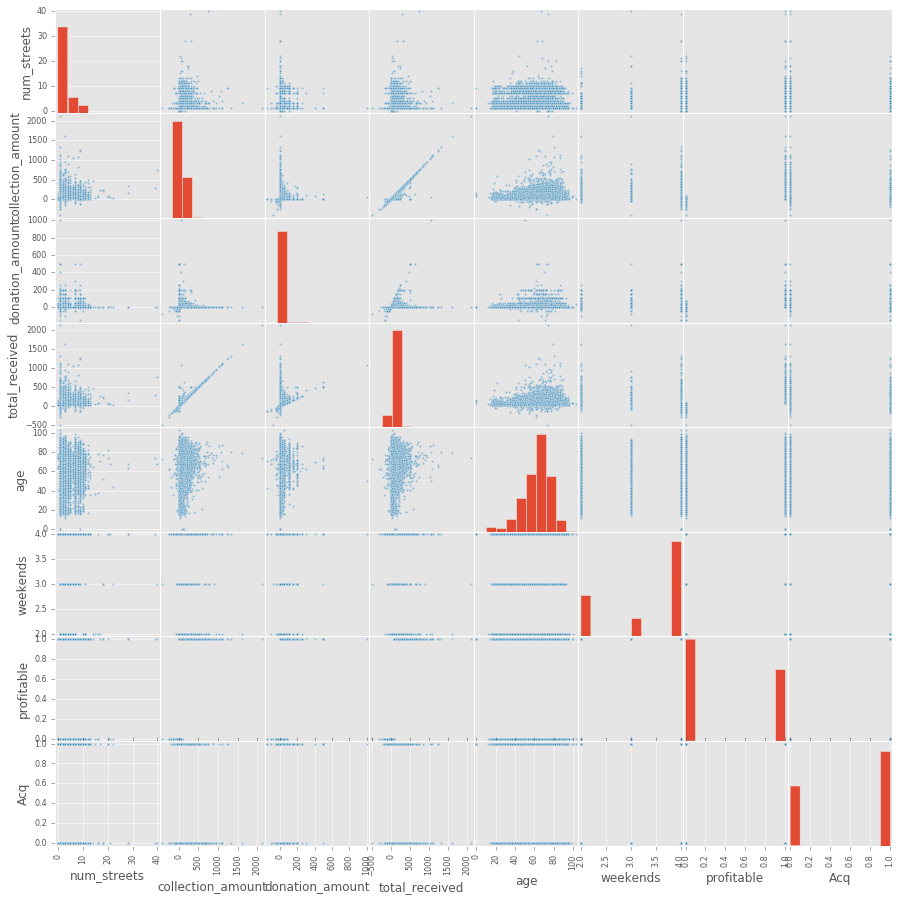

In [9]:
#create scatter matrix
pd.scatter_matrix(charity, figsize=(15,15))

In [10]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
feature_cols = ['age', 'Acq', 'postcode', 'weekends','total_received']
X = charity[feature_cols]
y = charity.profitable
logreg.fit(X, y)
assorted_pred_class = logreg.predict(X)

In [11]:
# print the class predictions
assorted_pred_class

array([1, 1, 1, ..., 0, 1, 0])

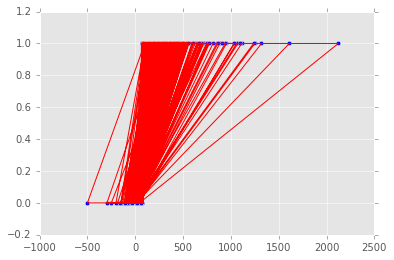

In [12]:
# plot the class predictions
plt.scatter(charity.total_received, charity.profitable)
plt.plot(charity.total_received, assorted_pred_class, color='red')

In [13]:
# store the predicted probabilites of class 1
assorted_pred_prob = logreg.predict_proba(X)[:, 1]
assorted_pred_prob

array([  1.00000000e+00,   1.00000000e+00,   1.00000000e+00, ...,
         1.94837961e-03,   1.00000000e+00,   7.05956740e-07])

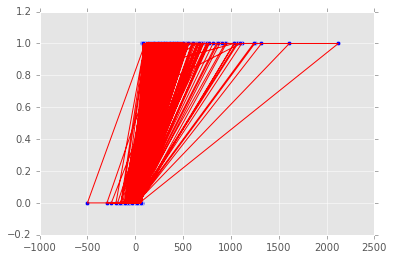

In [15]:
# plot the predicted probabilities
plt.scatter(charity.total_received, charity.profitable)
plt.plot(charity.total_received, assorted_pred_prob, color='red')

In [15]:
#add in ATO data and see if I can improve my model
tax = pd.read_csv('2014tax2.csv')
tax['postcode'] = tax['postcode'].astype(str)
charity_new = pd.merge(charity, tax, on='postcode')
charity_new.head()
print charity_new.columns



Index([u'postcode', u'num_streets', u'collection_amount', u'donation_amount',
       u'total_received', u'age', u'weekends', u'profitable', u'Acq',
       u'tax individuals', u'avg tax income', u'avg gross tax paid',
       u'avg net tax paid', u'avg salary', u'no pensions', u'avg pension',
       u'avg income', u'no donations', u'value donations',
       u'avg donation value'],
      dtype='object')


In [16]:
feature_cols = ['age', 'Acq', 'postcode', 'avg donation value', 'no donations', 'avg tax income']
X = charity_new[feature_cols]
y = charity_new.total_received
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred_class = linreg.predict(X_test)
from sklearn import metrics
print metrics.r2_score(y_test, y_pred_class)

0.0993599548147


In [31]:
lm = sm.OLS(y, X).fit()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121e4d490>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x133a9f310>]], dtype=object)

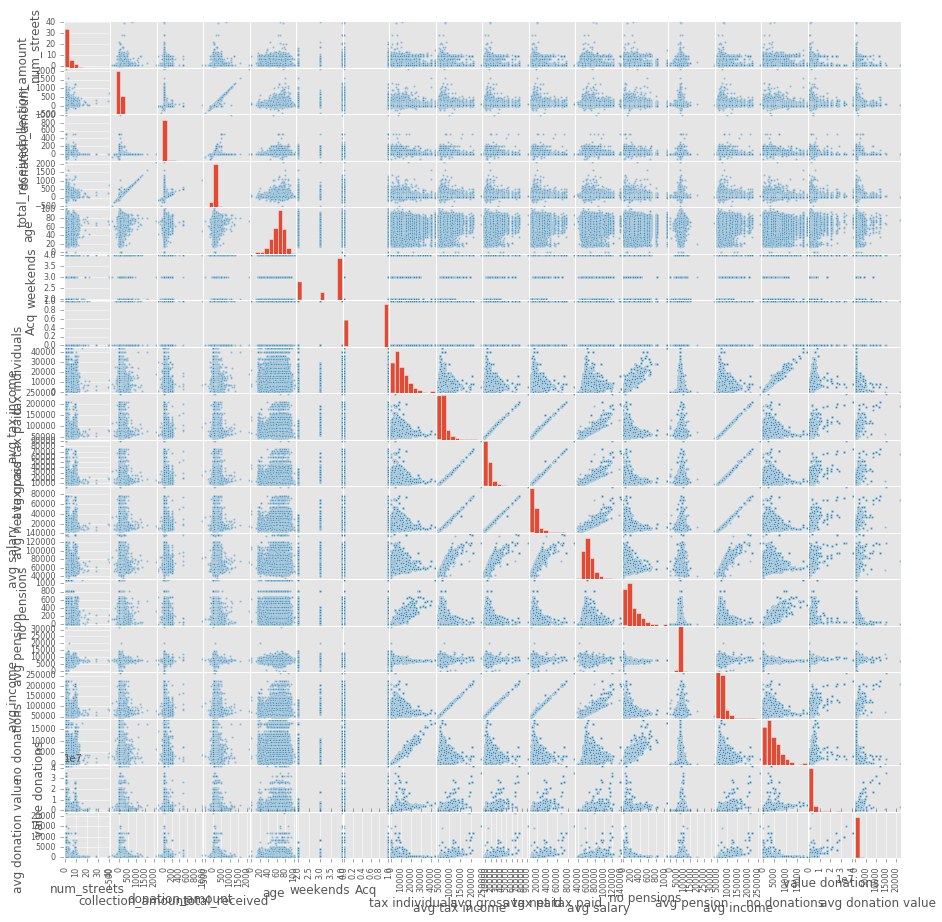

In [14]:
#create scatter matrix
pd.scatter_matrix(charity_new, figsize=(15,15))

In [32]:
#X = charity_new.filter(regex="[^total_received|^collection_amount|^donation_amount]")
X = charity_new.filter(regex="[^total_received|^collection_amount]")
y = charity_new.total_received
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred_class = linreg.predict(X_test)
from sklearn import metrics
print metrics.r2_score(y_test, y_pred_class)

0.102058468842


('Coefficients: \n', array([ -4.70462402e-03,   3.66004264e-01,   8.08894986e-01,
         3.95121523e+00,  -2.12703638e+01,   9.42851949e-04,
         9.03273620e-03,  -5.56748393e-03,  -4.49999525e-03,
        -5.86257208e-04,  -1.41268416e-02,  -2.29381599e-04,
        -3.97364360e-03,  -2.00821215e-03,   1.09501961e-06,
        -5.75516007e-04]))
Residual sum of squares: 4068.82
Variance score: 0.10


ValueError: x and y must be the same size

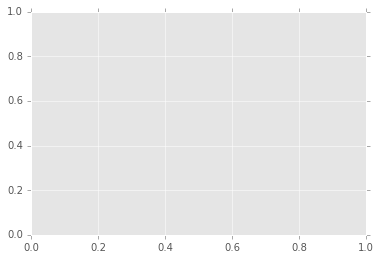

In [33]:
from sklearn import linear_model

# The coefficients
print('Coefficients: \n', linreg.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((linreg.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % linreg.score(X_test, y_test))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, linreg.predict(X_test), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [22]:
# evaluate the model using 10-fold cross-validation
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(LinearRegression(), X, y, scoring='r2', cv=100)
print scores
print scores.mean()

[ -1.52430881e+02   1.25366304e-02  -5.35846716e-02   4.35836555e-02
   4.64264721e-02   4.70729673e-02   7.01510068e-02   5.29410585e-02
  -3.02581986e-03  -2.23628786e-02   3.14495207e-02   5.90377584e-02
   6.16471257e-03   2.43050201e-02   8.36398876e-02   4.19411282e-02
   3.77130264e-02   7.03696822e-02   2.58376399e-04   6.90912247e-02
   1.20551271e-02  -1.75696180e-01   4.65565877e-02   3.35169172e-02
   1.03741915e-01   1.14689374e-02   3.35360990e-02  -1.24464410e-02
   2.83316940e-02   1.33533101e-01  -1.00340064e-02  -1.43240119e-01
   6.06060629e-02   6.05516529e-02   4.77595400e-03   7.31414261e-02
   3.92053157e-02  -1.34698881e-01   1.06965012e-02   1.30655231e-01
   4.11967919e-02   9.89075258e-02   4.87166791e-02   7.98284548e-02
   5.83762708e-02  -1.56427017e-03   7.95271332e-02   5.95659172e-02
  -3.63310959e-04  -3.28601064e-01  -4.46557311e-02  -2.31390430e-02
   6.65657072e-02   2.51030663e-02   2.47413598e-02  -4.24742799e-01
   3.58576539e-02   1.14961132e-02

In [25]:
#this is really bad - linear regression not really doing it for me..

AttributeError: 'LinearRegression' object has no attribute 'summary'

In [28]:
# evaluate the model using 10-fold cross-validation
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(LinearRegression(), X, y, scoring='mean_squared_error', cv=100)
print scores
print scores.mean()
print 'RMSE =', np.sqrt(metrics.mean_squared_error(y_test, y_pred_class))


[ -1.99426202e+06  -1.62448087e+04  -1.09630466e+04  -4.03126158e+03
  -1.09494324e+04  -5.46155705e+03  -6.40171768e+03  -6.63045800e+03
  -6.18150222e+03  -4.06911477e+03  -4.85768810e+03  -5.15206115e+03
  -3.58493163e+03  -6.30690510e+03  -4.60796752e+03  -4.48736090e+03
  -3.06706604e+03  -4.23093368e+03  -3.17497885e+03  -8.23844400e+03
  -7.07533700e+03  -5.38797609e+03  -9.31574719e+03  -3.69104794e+03
  -4.69903534e+03  -5.35517676e+03  -3.95461106e+03  -6.04923512e+03
  -3.24678636e+03  -5.07619827e+03  -4.22392871e+03  -3.87726599e+03
  -6.14309785e+03  -2.91110734e+03  -4.48857167e+03  -3.86216097e+03
  -7.51208375e+03  -5.42968104e+03  -3.18334743e+03  -3.89647319e+03
  -2.52984155e+03  -4.03178724e+03  -2.86928611e+03  -3.54866185e+03
  -4.52937464e+03  -5.63714028e+03  -2.09983825e+03  -3.18371900e+03
  -4.03697774e+03  -4.04469511e+03  -3.58320257e+03  -1.69550806e+03
  -1.63799214e+03  -5.79536323e+03  -3.79688026e+03  -3.86208448e+03
  -6.31719423e+03  -1.90530124e+03

In [ ]:
#plot the clusters
colors = np.array(['#FF0054','#FBD039','#23C2BC','#23C2BC'])
plt.figure()
charity.plot(kind='scatter', x='age', y='total_received',c=colors[y_kmeans])

In [ ]:
#Try Decision Trees
from sklearn import tree
from sklearn.cross_validation import train_test_split
from sklearn import metrics

In [ ]:
#split data up for training
charity = d['Survived'].copy(deep=True)
del d['Survived']

d

In [ ]:
y = charity.array('total_received')
print y

In [ ]:
X = charity
#X.drop('total_received', axis=1, inplace=True)
#X.drop('collection_amount', axis=1, inplace=True)
#X.drop('donation_amount', axis=1, inplace=True)
#y = X.total_received()
X.describe(include='all')

In [ ]:
#PCA Analysis
from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition
from sklearn import datasets

pca = decomposition.PCA(n_components=1)
X_r = pca.fit_transform(X)

y = charity.total_received()

plt.figure()
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], c=c, label=target_name)
plt.legend()
plt.title('PCA(2 components) of IRIS dataset')

In [ ]:
from sklearn import svm
from sklearn.datasets import samples_generator
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.pipeline import Pipeline
# generate some data to play with
#X, y = samples_generator.make_classification(
# n_informative=5, n_redundant=0, random_state=42)
# ANOVA SVM-C
#anova_filter = SelectKBest(f_regression, k=5)
#clf = svm.SVC(kernel='linear')
#anova_svm = Pipeline([('anova', anova_filter), ('svc', clf)])
>>> # You can set the parameters using the names issued
>>> # For instance, fit using a k of 10 in the SelectKBest
>>> # and a parameter 'C' of the svm
>>> anova_svm.set_params(anova__k=10, svc__C=.1).fit(X, y)
...                                              
Pipeline(steps=[...])
>>> prediction = anova_svm.predict(X)
>>> anova_svm.score(X, y)                        
0.77...
>>> # getting the selected features chosen by anova_filter
>>> anova_svm.named_steps['anova'].get_support()
... 
array([ True,  True,  True, False, False,  True, False,  True,  True, True,
       False, False,  True, False,  True, False, False, False, False,
       True], dtype=bool)